In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [11]:
# generate data
np.random.seed(12345)
arparams = np.array([.8])
maparams = np.array([0])
ar = np.r_[1, -arparams] # include zero-lag and use an opposite sign, see note below
ma = np.r_[1, maparams] # include zero-lag
y = sm.tsa.arma_generate_sample(ar, ma, nsample = 100, scale = 1) # y_{0},...\y_{99}

In [26]:
# 差一期的 covariance
lagged_data = np.roll(y, 1) 
pre_processed_data = np.vstack((y, lagged_data)) 
cov_mat = np.cov(pre_processed_data)
cov_mat[0,1]

3.9502128487251684

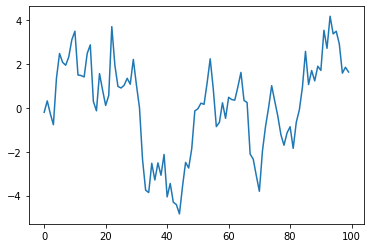

In [3]:
# plot the seires
plt.plot(y)

In [6]:
# fit model
mod = sm.tsa.ARIMA(y[0:(len(y)-1)], order=(1, 0, 0))
res = mod.fit()
# summary of fitted model
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   98
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -142.781
Date:                Wed, 06 Mar 2024   AIC                            291.562
Time:                        10:53:52   BIC                            299.317
Sample:                             0   HQIC                           294.699
                                 - 98                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1427      0.790      0.181      0.857      -1.406       1.691
ar.L1          0.8683      0.052     16.623      0.000       0.766       0.971
sigma2         1.0637      0.148      7.199      0.0

In [8]:
y[-2:] # y_{98}, y_{99}

array([1.84829262, 1.63131067])

In [9]:
print((y[-2]-res.params[0])*res.params[1]) # \hat{y}_{99}
print((y[-2]-res.params[0])*res.params[1]*res.params[1]) # \hat{y}_{100}

print((y[-2]-res.params[0])*res.params[1]+res.params[0]) # \hat{y}_{99}
print((y[-2]-res.params[0])*res.params[1]*res.params[1]+res.params[0]) # \hat{y}_{100}

1.4809222285576262
1.2858264051243373
1.623595304429663
1.428499480996374


In [ ]:
print(res.forecast(steps=2, signal_only=True))
print(res.forecast(steps=2, signal_only=False)) # default

In [ ]:
fcast_res = res.get_forecast(steps=2, signal_only=True)
print(fcast_res.summary_frame(alpha=0.10))